In [1]:
import sys
sys.path.append(r'D:\Python ML\SA-geochemical-maps\src')
import cartopy.crs as ccrs
from matplotlib.colors import BoundaryNorm, LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl


import create_chem_dataset as ccd
import max_dh_chem as mdc
from interpolation import MapBase, interpolate

import pandas as pd
import numpy as np

In [2]:
source_path = r'D:\Unearthed_SARIG_Data_Package\SARIG_Data_Package\sarig_rs_chem_exp.csv'
out_path = r'D:\Python ML\SA-geochemical-maps\Data\Processed_2'
drill_hole_spatial = r'D:\Python ML\SA-geochemical-maps\Data\interim\DH_data.csv'
method_path = r'D:\Python ML\SA-geochemical-maps\notebooks\chem_method_code_map.csv'


In [3]:
elements = ['Fe2O3','U','Ag','Pb','Cu','Zn','Co','Li','Ni','Fe','NiO', 'U3O8', 'Au', 'FeO', 'CoO']

element = 'Ag'

In [4]:
clean_Ag = ccd.create_dh_chem_data(source_path, element, method_path, out_path)


Need to remove spurious samples and holes as determined during the EDA phase, before determining max DH value

In [5]:
clean_Ag.drop(clean_Ag[clean_Ag.DETERMINATION.str.contains(r'unknown', na=False, regex=False)].index, inplace=True)
clean_Ag.drop(clean_Ag[clean_Ag.DETERMINATION.str.contains(r'UKN', na=False, regex=False)].index, inplace=True)
clean_Ag.drop(clean_Ag[clean_Ag.DETERMINATION.str.contains(r'pXRF', na=False, regex=False)].index, inplace=True)
clean_Ag.drop(clean_Ag[clean_Ag.DETERMINATION.str.contains(r'unknown', na=False, regex=False)].index, inplace=True)


In [6]:
norm_data = mdc.max_dh_chem(clean_Ag, drill_hole_spatial)

In [7]:
clean_Ag.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
16403,658672,DC,353.0,1494.43,1494.74,1630286,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.1,ppm,IC3M,1,0.00001,ICP-MS,MA,unknown
16451,658673,DC,353.0,1495.35,1495.65,1630287,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.1,ppm,IC3M,1,0.00001,ICP-MS,MA,unknown
16667,658670,DC,353.0,1405.43,1405.74,1630281,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.1,ppm,IC3M,1,0.00001,ICP-MS,MA,unknown
16691,658670,DC,353.0,1405.43,1405.74,1630282,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.1,ppm,IC3M,1,0.00001,ICP-MS,MA,unknown
16715,658670,DC,353.0,1405.43,1405.74,1630283,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.1,ppm,IC3M,0,0.10000,ICP-MS,MA,unknown


Normalise max dh data to average crustal abundance

In [8]:
norm_data['times_ave_crustal_abund'] = norm_data.converted_ppm.apply(lambda x: x / 0.056)

In [9]:
norm_data.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,...,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION,DH_NAME,SITE_NO,LONGITUDE_GDA2020,LATITUDE_GDA2020,times_ave_crustal_abund
0,1082427,INT,217619.0,32.0,36.0,691468,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.50,...,0,0.50000,ICP-OES,N/S,unknown,97WDR67,1114815,136.479631,-32.773339,8.928571
1,2235682,HCORE,293114.0,299.0,300.0,1772255,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Ag,0.25,...,0,0.25000,ICP-MS,MA,unknown,HDD-097,2043343,137.876625,-34.536461,4.464286
2,2857184,CT,329990.0,33.0,34.0,2367061,GEOCHEMISTRY,Analabs Pty Ltd.,Ag,0.05,...,0,0.05000,AAS,AR,unknown,LRC140,2121258,134.750443,-31.211828,0.892857
3,458873,CT,148.0,310.0,312.0,150903,GEOCHEMISTRY,"Comlabs Pty Ltd, S.A.",Ag,1.00,...,1,0.00001,AAS,N/S,unknown,BN 1,182,129.166978,-31.168831,0.000179
4,2930141,HCORE,332755.0,215.0,216.0,2437653,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Ag,0.25,...,0,0.25000,XRF,FU,unknown,HDD-298,2125347,137.872059,-34.548679,4.464286


In [10]:
norm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161506 entries, 0 to 161505
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SAMPLE_NO                161506 non-null  int64  
 1   SAMPLE_SOURCE_CODE       161494 non-null  object 
 2   DRILLHOLE_NUMBER         161506 non-null  float64
 3   DH_DEPTH_FROM            161413 non-null  float64
 4   DH_DEPTH_TO              161232 non-null  float64
 5   SAMPLE_ANALYSIS_NO       161506 non-null  int64  
 6   ANALYSIS_TYPE_DESC       161506 non-null  object 
 7   LABORATORY               153952 non-null  object 
 8   CHEM_CODE                161506 non-null  object 
 9   VALUE                    161506 non-null  float64
 10  UNIT                     161506 non-null  object 
 11  CHEM_METHOD_CODE         161506 non-null  object 
 12  BDL                      161506 non-null  int64  
 13  converted_ppm            161506 non-null  float64
 14  DETE

In [11]:
norm_data.loc[norm_data['converted_ppm'].idxmax()]

SAMPLE_NO                                  2421758
SAMPLE_SOURCE_CODE                              CT
DRILLHOLE_NUMBER                          300659.0
DH_DEPTH_FROM                                 42.0
DH_DEPTH_TO                                   43.0
SAMPLE_ANALYSIS_NO                         1952503
ANALYSIS_TYPE_DESC                    GEOCHEMISTRY
LABORATORY                 ALS Chemex, Adelaide SA
CHEM_CODE                                       Ag
VALUE                                         25.6
UNIT                                             %
CHEM_METHOD_CODE                          ME-MS61r
BDL                                              0
converted_ppm                             256000.0
DETERMINATION                               ICP-MS
DIGESTION                                       4A
FUSION                                     unknown
DH_NAME                                    BGAC004
SITE_NO                                    2059724
LONGITUDE_GDA2020              

In [12]:
norm_data.times_ave_crustal_abund.min()

0.00017857142857142857

In [13]:
max_v, min_v = norm_data.times_ave_crustal_abund.max().astype(int), norm_data.times_ave_crustal_abund.min().astype(int) 
print(f'For the element {element}: the max value range is {max_v}, while the min is {min_v}')

proj = ccrs.epsg(3107)   #GDA 94/SA Lambert
levels = list(range(min_v, max_v, 1))
cmap = plt.get_cmap('plasma')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
log_norm = LogNorm()
n_dh = len(norm_data.DRILLHOLE_NUMBER)

For the element Ag: the max value range is 4571428, while the min is 0


C:\Users\dutchr01\Anaconda3\envs\metpy\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dutchr01\Anaconda3\envs\metpy\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dutchr01\Anaconda3\envs\metpy\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dutchr01\Anaconda3\envs\metpy\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(

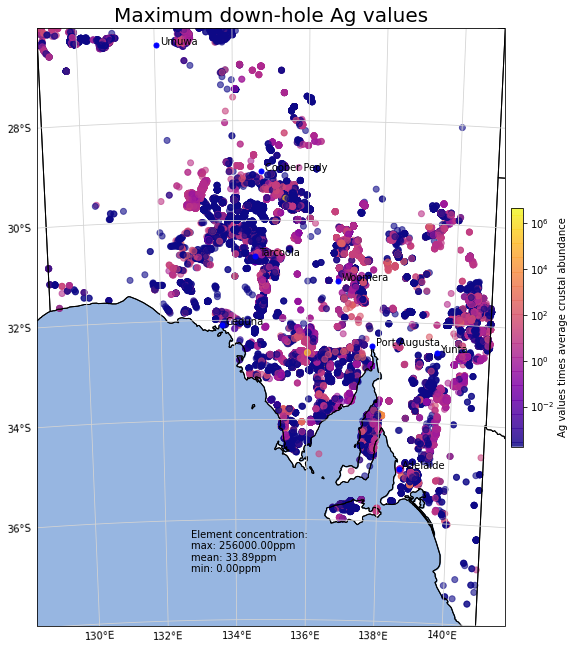

In [14]:
mpl.rcParams['agg.path.chunksize'] = 10000

title = f'Maximum down-hole {element} values'
label = f'{element} values times average crustal abundance'
out_fig = out_path+'\\'+f'Max_downhole_{element}.jpg'
inset_title = f'Number of drill holes:\n{n_dh}'
x, y = norm_data.LONGITUDE_GDA2020.values, norm_data.LATITUDE_GDA2020.values
max_val, min_val, mean_val = norm_data.converted_ppm.max(), norm_data.converted_ppm.min(), norm_data.converted_ppm.mean()
annot = f'Element concentration:\nmax: {max_val:.2f}ppm\nmean: {mean_val:.2f}ppm\nmin: {min_val:.2f}ppm'

fig, view, inset = MapBase(proj, title, inset_title, add_inset=False)
plot = view.scatter(x, y, c=norm_data.times_ave_crustal_abund, cmap=cmap, norm=log_norm, alpha=0.6, transform=ccrs.PlateCarree())
fig.colorbar(plot, ax=view, shrink=.4, pad=0.01, label=label) #boundaries=levels, 
#inset.plot(x, y,color='blue', marker='o', markersize=2, linestyle='None', transform=ccrs.Geodetic())
    
view.annotate(text=annot, xy=(0.33,0.09), xycoords='axes fraction')
plt.savefig(out_fig, dpi=300, bbox_inches='tight')
plt.show()

In [15]:
gx, gy, img = interpolate(norm_data, proj)

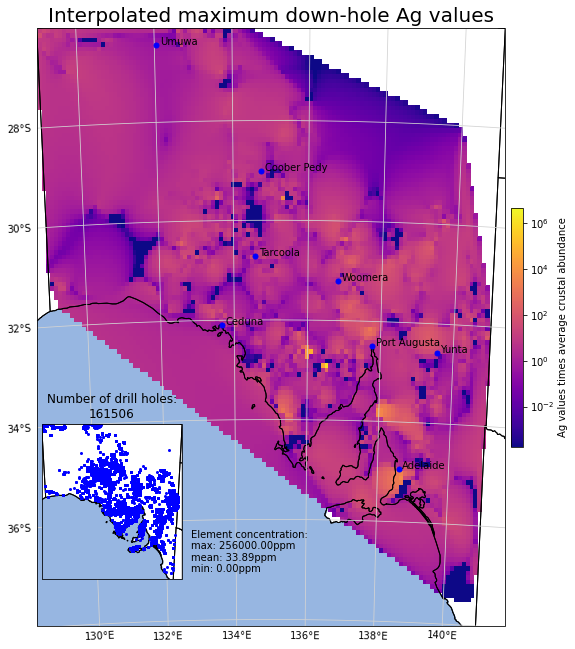

In [16]:
title = f'Interpolated maximum down-hole {element} values'
label = f'{element} values times average crustal abundance'
out_fig = out_path+'\\'+f'Interp_Max_downhole_{element}.jpg'
inset_title = f'Number of drill holes:\n{n_dh}'
x, y = norm_data.LONGITUDE_GDA2020.values, norm_data.LATITUDE_GDA2020.values
max_val, min_val, mean_val = norm_data.converted_ppm.max(), norm_data.converted_ppm.min(), norm_data.converted_ppm.mean()
annot = f'Element concentration:\nmax: {max_val:.2f}ppm\nmean: {mean_val:.2f}ppm\nmin: {min_val:.2f}ppm'

fig, view, inset = MapBase(proj, title, inset_title)
mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=log_norm)
fig.colorbar(mmb, ax=view, shrink=.4, pad=0.01, label=label) #boundaries=levels, 
inset.plot(x, y,color='blue', marker='o', markersize=2, linestyle='None', transform=ccrs.Geodetic())
    
view.annotate(text=annot, xy=(0.33,0.09), xycoords='axes fraction')
plt.savefig(out_fig, dpi=300, bbox_inches='tight')
plt.show()